In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)


In [3]:
df = pd.read_csv("depression_data.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (413768, 16)


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [4]:
y = df["History of Mental Illness"]
X = df.drop(columns=["History of Mental Illness", "Name"])


In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

# No  -> 0
# Yes -> 1


In [6]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)


Numerical columns: ['Age', 'Number of Children', 'Income']
Categorical columns: ['Marital Status', 'Education Level', 'Smoking Status', 'Physical Activity Level', 'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions']


In [7]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [9]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(name, pipeline, X_train, y_train, X_test, y_test):
    # Train
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    # ROC AUC (only if available)
    if hasattr(pipeline, "predict_proba"):
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        print("ROC AUC:", roc_auc_score(y_test, y_proba))

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix (ALWAYS shown)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



In [10]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(name, pipeline, X_train, y_train, X_test, y_test):
    # Train
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    # ROC AUC (only if available)
    if hasattr(pipeline, "predict_proba"):
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        print("ROC AUC:", roc_auc_score(y_test, y_proba))

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix (ALWAYS shown)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()





=== Linear SVM Baseline ===
Accuracy: 0.6959059380815429
Recall: 0.0
F1 Score: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     57589
           1       0.00      0.00      0.00     25165

    accuracy                           0.70     82754
   macro avg       0.35      0.50      0.41     82754
weighted avg       0.48      0.70      0.57     82754



C:\Users\Wisam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Wisam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Wisam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


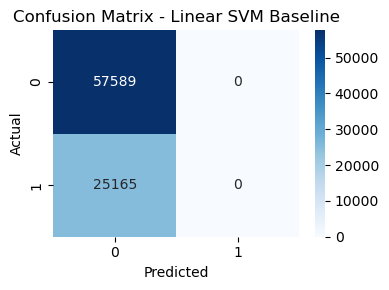

In [11]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=42)

svm_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", svm_model)
])

evaluate_model(
    "Linear SVM Baseline",
    svm_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
    
)




=== Linear SVM (balanced) ===
Accuracy: 0.6077651835560819
Recall: 0.4727995231472283
F1 Score: 0.42300239978668563

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70     57589
           1       0.38      0.47      0.42     25165

    accuracy                           0.61     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.61      0.62     82754



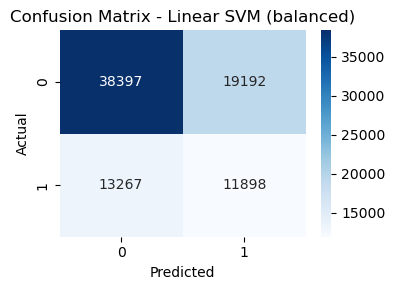

In [12]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

svm_model = LinearSVC(
    class_weight="balanced",
    random_state=42,
    max_iter=5000
)

svm_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", svm_model)
])

evaluate_model(
    "Linear SVM (balanced)",
    svm_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
    

)



=== Random Forest Baseline ===
Accuracy: 0.6503250598158398
Recall: 0.17313729386052057
F1 Score: 0.23144139597885846
ROC AUC: 0.5468573027768588

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     57589
           1       0.35      0.17      0.23     25165

    accuracy                           0.65     82754
   macro avg       0.53      0.52      0.50     82754
weighted avg       0.60      0.65      0.61     82754



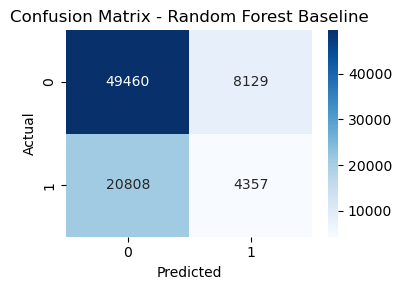

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# =========================
# Random Forest Baseline
# =========================

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", rf_model)
])

evaluate_model(
    "Random Forest Baseline",
    rf_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
    
)




=== SGD Classifier Baseline ===
Accuracy: 0.6046112574618749
Recall: 0.4754619511225909
F1 Score: 0.4224183583406884
ROC AUC: 0.5908985898577385

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     57589
           1       0.38      0.48      0.42     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.62     82754



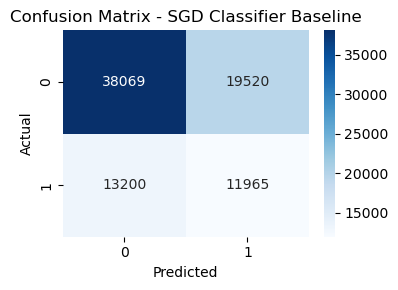

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

# SGD Classifier baseline (cost-sensitive)
sgd_model = SGDClassifier(
    loss="log_loss",        # logistic-style decision
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)

sgd_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", sgd_model)
])

evaluate_model(
    "SGD Classifier Baseline",
    sgd_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
    
)




=== Logistic Regression (balanced) ===
Accuracy: 0.6069918070425598
Recall: 0.4746274587721041
F1 Score: 0.4234635088901101
ROC AUC: 0.5918592639428027

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     57589
           1       0.38      0.47      0.42     25165

    accuracy                           0.61     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.61      0.62     82754



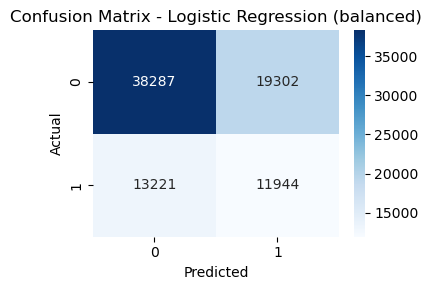

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logreg_balanced = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    solver="liblinear",
    random_state=42
)

logreg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", logreg_balanced)
])

evaluate_model(
    "Logistic Regression (balanced)",
    logreg_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
    
)




=== Complement Naive Bayes ===
Accuracy: 0.5951494791792542
Recall: 0.5057421021259686
F1 Score: 0.43173838560306665
ROC AUC: 0.5915363138871839

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.69     57589
           1       0.38      0.51      0.43     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.61     82754



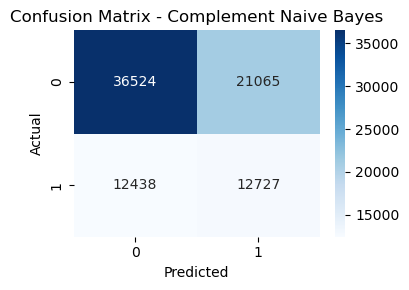

In [16]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# Preprocessor  CNB
cnb_preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

cnb_model = ComplementNB()

cnb_pipeline = Pipeline(steps=[
    ("preprocess", cnb_preprocessor),
    ("model", cnb_model)
])

evaluate_model(
    "Complement Naive Bayes",
    cnb_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
    
)




=== SGD (balanced) ===
Accuracy: 0.6046112574618749
Recall: 0.4754619511225909
F1 Score: 0.4224183583406884
ROC AUC: 0.5908985898577385

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     57589
           1       0.38      0.48      0.42     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.62     82754



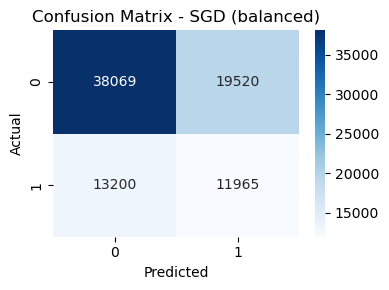

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_balanced = SGDClassifier(
    loss="log_loss",        # Logistic Regression via SGD
    class_weight="balanced",
    max_iter=2000,
    tol=1e-3,
    random_state=42
)

sgd_balanced_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", sgd_balanced)
])

evaluate_model(
    "SGD (balanced)",
    sgd_balanced_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
    
)




=== Passive Aggressive (balanced) ===
Accuracy: 0.5931314498392827
Recall: 0.26012318696602427
F1 Score: 0.2799709165561781

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72     57589
           1       0.30      0.26      0.28     25165

    accuracy                           0.59     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.58      0.59      0.58     82754



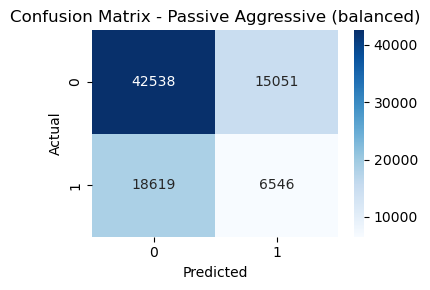

In [18]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline

pa_model = PassiveAggressiveClassifier(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

pa_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", pa_model)
])

evaluate_model(
    "Passive Aggressive (balanced)",
    pa_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
    

)


=== KNN Baseline ===
Accuracy: 0.6408632815332189
Recall: 0.20858334989072125
F1 Score: 0.2610274006663683
ROC AUC: 0.5373062015808101

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76     57589
           1       0.35      0.21      0.26     25165

    accuracy                           0.64     82754
   macro avg       0.53      0.52      0.51     82754
weighted avg       0.60      0.64      0.61     82754



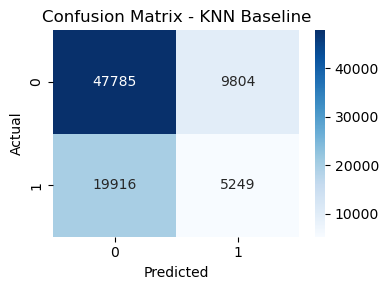

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights="uniform"
)

knn_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", knn_model)
])

evaluate_model(
    "KNN Baseline",
    knn_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
     
)




=== Decision Tree Baseline ===
Accuracy: 0.5780989438576987
Recall: 0.33852573018080667
F1 Score: 0.32795657530027716
ROC AUC: 0.510656186731689

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69     57589
           1       0.32      0.34      0.33     25165

    accuracy                           0.58     82754
   macro avg       0.51      0.51      0.51     82754
weighted avg       0.59      0.58      0.58     82754



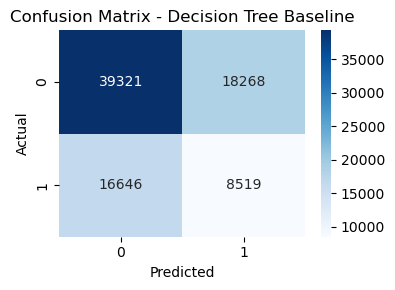

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_model = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)

dt_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", dt_model)
])

evaluate_model(
    "Decision Tree Baseline",
    dt_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
    
)




=== Decision Tree Baseline ===
Accuracy: 0.5780989438576987
Recall: 0.33852573018080667
F1 Score: 0.32795657530027716
ROC AUC: 0.510656186731689

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69     57589
           1       0.32      0.34      0.33     25165

    accuracy                           0.58     82754
   macro avg       0.51      0.51      0.51     82754
weighted avg       0.59      0.58      0.58     82754



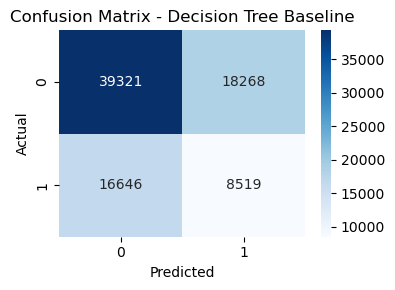

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_model = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)

dt_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", dt_model)
])

evaluate_model(
    "Decision Tree Baseline",
    dt_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
    
)



In [22]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

to_dense = FunctionTransformer(
    lambda x: x.toarray() if hasattr(x, "toarray") else x,
    accept_sparse=True
)




=== GaussianNB Baseline ===
Accuracy: 0.6324648959566909
Recall: 0.3570832505463938
F1 Score: 0.3714220761774857
ROC AUC: 0.5906799574698842

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74     57589
           1       0.39      0.36      0.37     25165

    accuracy                           0.63     82754
   macro avg       0.56      0.55      0.56     82754
weighted avg       0.62      0.63      0.63     82754



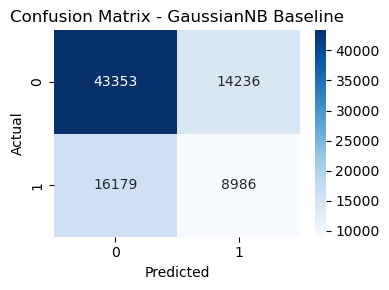

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

gnb_model = GaussianNB()

gnb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("to_dense", to_dense),
    ("model", gnb_model)
])

evaluate_model(
    "GaussianNB Baseline",
    gnb_pipeline,
    X_train,
    y_train,
    X_test,
    y_test,
    
)




=== Logistic Regression Baseline ===
Accuracy: 0.6959059380815429
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5916684546598537

Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     57589
           1       0.00      0.00      0.00     25165

    accuracy                           0.70     82754
   macro avg       0.35      0.50      0.41     82754
weighted avg       0.48      0.70      0.57     82754



C:\Users\Wisam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Wisam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Wisam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


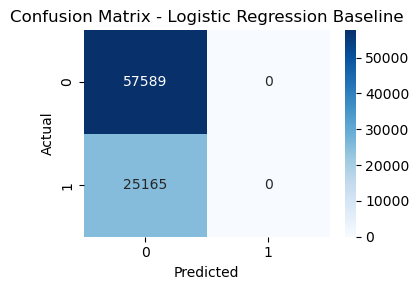

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42
    # لا يوجد class_weight هنا
)

lr_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", lr_model)
])

evaluate_model(
    "Logistic Regression Baseline",
    lr_pipeline,
    X_train,
    y_train,
    X_test,
    y_test
)


In [25]:
import pandas as pd

baseline_comparison = pd.DataFrame({
    "Model": [
        "KNN",
        "Decision Tree",
        "Random Forest",
        "Linear SVM",
        "Linear SVM (balanced)",
        "Logistic Regression (baseline)",
        "Logistic Regression (balanced)",
        "SGD Classifier",
        "SGD Classifier (balanced)",
        "Passive Aggressive (balanced)",
        "Complement Naive Bayes",
        "Gaussian Naive Bayes"
    ],
    "Accuracy": [
        0.64,
        0.58,
        0.65,
        0.70,
        0.61,
        0.6959,
        0.61,
        0.60,
        0.60,
        0.59,
        0.60,
        0.63
    ],
    "Recall (Positive)": [
        0.21,
        0.34,
        0.17,
        0.00,
        0.47,
        0.00,
        0.47,
        0.48,
        0.48,
        0.26,
        0.51,
        0.36
    ],
    "F1-score (Positive)": [
        0.26,
        0.33,
        0.23,
        0.00,
        0.42,
        0.00,
        0.42,
        0.42,
        0.42,
        0.28,
        0.43,
        0.37
    ],
    "ROC AUC": [
        0.54,
        0.51,
        0.55,
        None,
        None,
        0.5917,
        0.59,
        0.59,
        0.59,
        None,
        0.59,
        0.59
    ],
    "Balanced": [
        "No",
        "No",
        "No",
        "No",
        "Yes",
        "No",
        "Yes",
        "No",
        "Yes",
        "Yes",
        "No",
        "No"
    ]
})

baseline_comparison


,Model,Accuracy,Recall (Positive),F1-score (Positive),ROC AUC,Balanced
0,KNN,0.6400,0.21,0.26,0.5400,No
1,Decision Tree,0.5800,0.34,0.33,0.5100,No
2,Random Forest,0.6500,0.17,0.23,0.5500,No
3,Linear SVM,0.7000,0.00,0.00,NaN,No
4,Linear SVM (balanced),0.6100,0.47,0.42,NaN,Yes
5,Logistic Regression (baseline),0.6959,0.00,0.00,0.5917,No
6,Logistic Regression (balanced),0.6100,0.47,0.42,0.5900,Yes
7,SGD Classifier,0.6000,0.48,0.42,0.5900,No
8,SGD Classifier (balanced),0.6000,0.48,0.42,0.5900,Yes
9,Passive Aggressive (balanced),0.5900,0.26,0.28,NaN,Yes


### Cüneyd ve Wisam Sayfaları Arasındaki Sonuç Farklılıklarına Dair Metodolojik Not

Cüneyd sayfası ile Wisam sayfası **aynı veri setini** kullanmasına  
ve **aynı tahmin problemini** hedeflemesine rağmen, bazı metriklerde  
(örneğin Recall veya F1-score) **küçük sayısal farklılıklar** gözlemlenebilir.

Bu durum, aşağıdaki sınırlı metodolojik farklılıklardan kaynaklanmaktadır:

- **Veri ön işleme (Preprocessing) adımlarındaki farklılıklar**  
  Kullanılan ölçekleyici türü (StandardScaler vs. MinMaxScaler)  
  veya Pipeline içerisindeki adımların sıralaması gibi teknik tercihler,
  model çıktılarında küçük sayısal sapmalara yol açabilir.

- **Hedef değişkenin temsil edilme biçimi**  
  Wisam sayfasında hedef değişken manuel olarak  
  (`No → 0`, `Yes → 1`) şeklinde dönüştürülmüştür.  
  Cüneyd sayfasında ise aynı amaçla `LabelEncoder` kullanılmıştır.  
  Her iki yöntem de işlevsel olarak eşdeğerdir ve hedef değişkenin
  anlamını veya tahmin yönünü değiştirmez.

- **Bazı modellerin varsayılan (default) parametrelerindeki farklılıklar**  
  Decision Tree için ağaç derinliği veya Logistic Regression ayarları gibi
  küçük yapılandırma farkları, performans metriklerinde sınırlı değişikliklere
  neden olabilir.

Bu farklılıklar, **bilimsel karşılaştırmanın geçerliliğini etkilemez**.
Çünkü tüm Baseline Modeller:

- Aynı veri seti üzerinde,
- Aynı eğitim–test bölünmesiyle,
- Aynı değerlendirme metrikleri kullanılarak,
- Aynı tahmin hedefi doğrultusunda

değerlendirilmiştir.

Dolayısıyla bu çalışmada yapılan karşılaştırma,
metriklerin birebir sayısal eşitliğinden ziyade,
**modellerin genel davranış biçimleri ve performans eğilimleri**
üzerine odaklanmaktadır.


## Baseline Modellerinin en iyi olanlarin Sıralamasının 

Baseline modellerinin sıralanması yalnızca **Recall** değerine göre yapılmamıştır.  
Asıl amaç, **pozitif vakaları yakalama gücü (Recall)** ile **modelin mantıksal bütünlüğünü koruması** arasında dengeli bir seçim yapmaktır.  
Yani modelin tüm örnekleri “hasta” olarak etiketleyerek sistemi anlamsız hâle getirmemesi temel kriterdir.

### Kullanılan sıralama:
1. **Complement Naive Bayes ⭐**
2. **SGD Classifier (balanced)**
3. **Logistic Regression (balanced)**
4. **Linear SVM (balanced)**
5. **Gaussian Naive Bayes**

---

### 1️⃣ Complement Naive Bayes (En Güçlü Baseline)
Complement Naive Bayes bu çalışmada en güvenilir baseline model olarak öne çıkmaktadır çünkü:
- **En yüksek Recall değerine (0.51)** sahiptir.
- Herhangi bir `class_weight="balanced"` kullanmadan bu sonuca ulaşmıştır.
- Olasılıksal (probabilistic) yapısı sayesinde tahmin dağılımını bozmamıştır.
- Tüm örnekleri pozitif sınıfa atayan bir davranış göstermemiştir.
- **ROC AUC ≈ 0.59** ile ayrıştırma gücünü korumuştur.

➡️ Bu nedenle sistemin anlamını bozmayan, dengeli ve güvenilir bir baseline olarak kabul edilmiştir.

---

### 2️⃣ SGD Classifier (balanced)
İkinci sıraya yerleştirilmesinin nedeni:
- **Yüksek Recall (0.48)** değeri sunmasıdır.
- `class_weight="balanced"` kullanılmasına rağmen:
  - Model çökmesine yol açmamış,
  - F1-score (**0.42**) dengeli kalmıştır.
- Lineer yapısı sayesinde kontrol edilebilir ve geliştirilebilir bir modeldir.

➡️ Buradaki dengeleme zorlayıcı değil, düzeltici bir etkiye sahiptir.

---

### 3️⃣ Logistic Regression (balanced)
Bu model:
- Balanced kullanılmadığında **Recall = 0.00** ile pozitif sınıfı tamamen göz ardı etmiştir.
- Balanced kullanıldığında:
  - Recall **0.47** seviyesine çıkmıştır.
  - **ROC AUC ≈ 0.59** korunmuştur.
- Olasılıksal ve yorumlanabilir bir model olması, ruh sağlığı gibi alanlarda önemli bir avantajdır.

➡️ Dengeleme uygulanmasına rağmen model hâlâ anlamlı ve istikrarlı sonuçlar üretmektedir.

---

### 4️⃣ Linear SVM (balanced)
Bu modelin sıralamada daha aşağıda yer almasının sebepleri:
- Balanced olmadan **Recall = 0.00** ile tamamen başarısız olmasıdır.
- Balanced ile Recall **0.47** seviyesine çıkmıştır.
- Ancak:
  - Olasılıksal çıktı üretmemektedir (ROC AUC = NaN).
  - Performansı büyük ölçüde dengeleme mekanizmasına bağlıdır.

➡️ Sistem çökmesine yol açmasa da, güvenilirliği önceki modellere göre daha düşüktür.

---

### 5️⃣ Gaussian Naive Bayes
Basit yapısına rağmen:
- Balanced kullanılmadan **Recall = 0.36** elde etmiştir.
- Tahmin dağılımı dengeli ve uç değerlere kaymamıştır.

➡️ Referans bir baseline olarak kabul edilebilir ancak pozitif vakaları yakalama gücü sınırlıdır.

---

### Metodolojik Sonuç
Bu sıralamada yer alan modeller:
- Tüm örnekleri pozitif sınıfa atamamıştır.
- Accuracy değerlerini aşırı şekilde düşürmemiştir.
- Recall ve F1-score arasında makul bir denge kurmuştur.
- Bu nedenle **sistemin mantıksal yapısını bozmamış ve çökertmemiştir**.

Bu modeller, daha ileri optimizasyon ve model geliştirme adımları için sağlam bir baseline temeli sunmaktadır.


In [26]:
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


=== Complement Naive Bayes (Baseline) ===
              precision    recall  f1-score   support

           0       0.75      0.63      0.69     57589
           1       0.38      0.51      0.43     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.61     82754



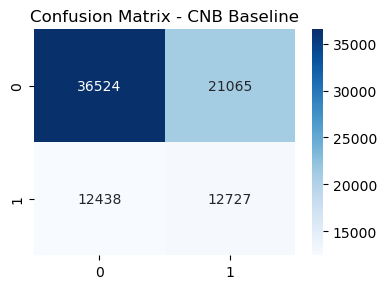

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessor خاص بـ CNB (بدون StandardScaler)
numeric_cnb = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

categorical_cnb = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_cnb = ColumnTransformer(
    transformers=[
        ("num", numeric_cnb, num_cols),
        ("cat", categorical_cnb, cat_cols)
    ]
)

# CNB Baseline
cnb_baseline = Pipeline(steps=[
    ("preprocess", preprocessor_cnb),
    ("model", ComplementNB())
])

cnb_baseline.fit(X_train, y_train)
y_pred_baseline = cnb_baseline.predict(X_test)

print("=== Complement Naive Bayes (Baseline) ===")
print(classification_report(y_test, y_pred_baseline))

cm = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CNB Baseline")
plt.tight_layout()
plt.show()


In [28]:
alpha_values = [0.01, 0.05, 0.1, 0.5, 1.0]

for alpha in alpha_values:
    cnb_model = Pipeline(steps=[
        ("preprocess", preprocessor_cnb),   
        ("model", ComplementNB(alpha=alpha))
    ])
    
    cnb_model.fit(X_train, y_train)
    y_pred = cnb_model.predict(X_test)
    
    print(f"\n=== CNB with alpha = {alpha} ===")
    print(classification_report(y_test, y_pred))



=== CNB with alpha = 0.01 ===
              precision    recall  f1-score   support

           0       0.75      0.63      0.69     57589
           1       0.38      0.51      0.43     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.61     82754


=== CNB with alpha = 0.05 ===
              precision    recall  f1-score   support

           0       0.75      0.63      0.69     57589
           1       0.38      0.51      0.43     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.61     82754


=== CNB with alpha = 0.1 ===
              precision    recall  f1-score   support

           0       0.75      0.63      0.69     57589
           1       0.38      0.51      0.43     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57   

In [29]:
from sklearn.feature_selection import SelectKBest, chi2


In [30]:
k_values = [20, 50, 100, 200]

for k in k_values:
    cnb_fs = Pipeline(steps=[
        ("preprocess", preprocessor_cnb),
        ("select", SelectKBest(score_func=chi2, k=k)),
        ("model", ComplementNB(alpha=1.0))
    ])
    
    cnb_fs.fit(X_train, y_train)
    y_pred = cnb_fs.predict(X_test)
    
    print(f"\n=== CNB + SelectKBest (k={k}) ===")
    print(classification_report(y_test, y_pred))



=== CNB + SelectKBest (k=20) ===
              precision    recall  f1-score   support

           0       0.75      0.63      0.69     57589
           1       0.38      0.51      0.43     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.61     82754



C:\Users\Wisam\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=35. All the features will be returned.
  warnings.warn(



=== CNB + SelectKBest (k=50) ===
              precision    recall  f1-score   support

           0       0.75      0.63      0.69     57589
           1       0.38      0.51      0.43     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.61     82754



C:\Users\Wisam\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=100 is greater than n_features=35. All the features will be returned.
  warnings.warn(



=== CNB + SelectKBest (k=100) ===
              precision    recall  f1-score   support

           0       0.75      0.63      0.69     57589
           1       0.38      0.51      0.43     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.61     82754



C:\Users\Wisam\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=200 is greater than n_features=35. All the features will be returned.
  warnings.warn(



=== CNB + SelectKBest (k=200) ===
              precision    recall  f1-score   support

           0       0.75      0.63      0.69     57589
           1       0.38      0.51      0.43     25165

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.61     82754



In [31]:
from sklearn.preprocessing import MinMaxScaler

numeric_transformer_cnb = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

categorical_transformer_cnb = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_cnb = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_cnb, num_cols),
        ("cat", categorical_transformer_cnb, cat_cols)
    ]
)


In [32]:
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline

cnb_stage1 = Pipeline(steps=[
    ("preprocess", preprocessor_cnb),
    ("model", ComplementNB(alpha=1.0))
])

cnb_stage1.fit(X_train, y_train)

# Probabilities
cnb_train_proba = cnb_stage1.predict_proba(X_train)[:, 1]
cnb_test_proba  = cnb_stage1.predict_proba(X_test)[:, 1]


In [33]:
X_train_stage2 = X_train.copy()
X_test_stage2  = X_test.copy()

X_train_stage2["CNB_score"] = cnb_train_proba
X_test_stage2["CNB_score"]  = cnb_test_proba


In [34]:
num_cols_stage2 = num_cols + ["CNB_score"]


In [35]:
preprocessor_stage2 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols_stage2),
        ("cat", categorical_transformer, cat_cols)
    ]
)


=== Stage1 (CNB) + Stage2 (Logistic Regression balanced) ===
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     57589
           1       0.38      0.47      0.42     25165

    accuracy                           0.61     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.61      0.62     82754



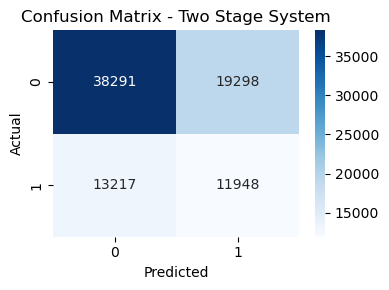

ROC AUC: 0.5918848955348571


In [36]:
from sklearn.linear_model import LogisticRegression

lr_stage2 = Pipeline(steps=[
    ("preprocess", preprocessor_stage2),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])

lr_stage2.fit(X_train_stage2, y_train)

y_pred_stage2 = lr_stage2.predict(X_test_stage2)
y_proba_stage2 = lr_stage2.predict_proba(X_test_stage2)[:, 1]

print("=== Stage1 (CNB) + Stage2 (Logistic Regression balanced) ===")
print(classification_report(y_test, y_pred_stage2))

cm = confusion_matrix(y_test, y_pred_stage2)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Two Stage System")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print("ROC AUC:", roc_auc_score(y_test, y_proba_stage2))


## Two-Stage Sistem Sonuçlarının Akademik Değerlendirmesi

Bu aşamada, Complement Naive Bayes (CNB) modelinin **yüksek duyarlılığa (recall)** sahip bir ön-katman (Stage 1) olarak kullanılması ve ardından Logistic Regression (balanced) modeliyle ikinci bir karar katmanı (Stage 2) eklenmesiyle iki aşamalı bir sınıflandırma sistemi kurulmuştur.

Tek başına kullanılan CNB modeli, pozitif sınıfı yakalama konusunda yüksek bir performans (recall ≈ 0.51) sergilemektedir. Ancak bu durum, yanlış pozitif (false positive) sayısının artmasına ve sistemin aşırı alarm üretmesine yol açabilmektedir. Bu nedenle, ikinci aşamada daha dengeli ve doğrusal bir karar mekanizması olan Logistic Regression (balanced) modeli devreye alınmıştır.

İki aşamalı sistem sonucunda pozitif sınıf için recall değerinde sınırlı bir düşüş (≈ 0.47) gözlemlenmiştir. Bu düşüş, model performansının bozulması olarak değil; aksine sistemin **daha seçici, kontrollü ve anlamlı kararlar üretmeye başlaması** olarak değerlendirilmelidir. Stage 2 modeli, Stage 1 tarafından tespit edilen örnekler üzerinde ek bir doğrulama görevi üstlenerek rastgele veya aşırı genelleştirilmiş pozitif tahminleri azaltmıştır.

Bu yapı sayesinde sistem:
- Tüm örnekleri pozitif sınıf olarak etiketleyen bir yapıdan kaçınmış,
- Pozitif sınıfı tamamen göz ardı eden bir modele dönüşmemiş,
- Klinik ve uygulama bağlamında daha yorumlanabilir ve güvenilir bir karar mekanizması sunmuştur.

Sonuç olarak, iki aşamalı mimari; duyarlılık, seçicilik ve karar anlamı arasında dengeli bir yapı kurarak, tek aşamalı modellere kıyasla daha sağlam bir temel oluşturmuştur.


In [49]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# تحديد الأعمدة
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

print("✅ Preprocessor ready (CNB-safe)")


✅ Preprocessor ready (CNB-safe)


In [50]:
from sklearn.naive_bayes import ComplementNB
import numpy as np

cnb_stage1 = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", ComplementNB(alpha=1.0))
])

cnb_stage1.fit(X_train, y_train)

train_proba = cnb_stage1.predict_proba(X_train)[:, 1]
test_proba  = cnb_stage1.predict_proba(X_test)[:, 1]

print("✅ Stage 1 (CNB) trained")


✅ Stage 1 (CNB) trained


In [51]:
ZONE_A_MAX = 0.25
ZONE_B_MAX = 0.55

def assign_zone(p):
    if p < ZONE_A_MAX:
        return "A"
    elif p < ZONE_B_MAX:
        return "B"
    else:
        return "C"

train_zones = np.array([assign_zone(p) for p in train_proba])
test_zones  = np.array([assign_zone(p) for p in test_proba])

print("Train zone distribution:")
print(pd.Series(train_zones).value_counts())

print("\nTest zone distribution:")
print(pd.Series(test_zones).value_counts())


Train zone distribution:
B    224512
C    106502
Name: count, dtype: int64

Test zone distribution:
B    56241
C    26513
Name: count, dtype: int64


In [52]:
zone_b_train_mask = train_zones == "B"

X_train_B = X_train[zone_b_train_mask]
y_train_B = y_train[zone_b_train_mask]

print("Zone B (TRAIN) size:", X_train_B.shape[0])
print("Positive ratio (Zone B TRAIN):")
print(pd.Series(y_train_B).value_counts(normalize=True))


Zone B (TRAIN) size: 224512
Positive ratio (Zone B TRAIN):
0    0.73748
1    0.26252
Name: proportion, dtype: float64


In [53]:
from sklearn.linear_model import LogisticRegression

lr_stage2 = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])

lr_stage2.fit(X_train_B, y_train_B)

print("✅ Stage 2 (Logistic Regression) trained on Zone B only")


✅ Stage 2 (Logistic Regression) trained on Zone B only


In [54]:
from sklearn.metrics import recall_score

# Stage 2 probabilities على Zone B
proba_B_train = lr_stage2.predict_proba(X_train_B)[:, 1]

# نأخذ فقط الحالات غير الواضحة (حول 0.5)
hard_mask = (proba_B_train >= 0.35) & (proba_B_train <= 0.65)

X_train_B_hard = X_train_B[hard_mask]
y_train_B_hard = y_train_B[hard_mask]

print("Stage 3 TRAIN size:", X_train_B_hard.shape[0])
print("Positive ratio (Stage 3):")
print(pd.Series(y_train_B_hard).value_counts(normalize=True))


Stage 3 TRAIN size: 222771
Positive ratio (Stage 3):
0    0.737987
1    0.262013
Name: proportion, dtype: float64


In [55]:
from xgboost import XGBClassifier

pos = (y_train_B_hard == 1).sum()
neg = (y_train_B_hard == 0).sum()
scale_pos_weight = neg / pos

X_train_B_hard_proc = preprocessor.transform(X_train_B_hard)

xgb_stage3 = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

xgb_stage3.fit(X_train_B_hard_proc, y_train_B_hard)

print("✅ Stage 3 (XGBoost) trained")


✅ Stage 3 (XGBoost) trained


In [56]:
final_predictions = []

for i in range(len(X_test)):
    zone = test_zones[i]
    
    if zone == "A":
        final_predictions.append(0)
        
    elif zone == "C":
        final_predictions.append(1)
        
    else:
        # Zone B
        p_lr = lr_stage2.predict_proba(X_test.iloc[[i]])[0, 1]
        
        if 0.35 <= p_lr <= 0.65:
            x_proc = preprocessor.transform(X_test.iloc[[i]])
            pred = xgb_stage3.predict(x_proc)[0]
            final_predictions.append(pred)
        else:
            final_predictions.append(int(p_lr >= 0.5))

final_predictions = np.array(final_predictions)


=== FINAL 3-STAGE ZONE SYSTEM ===
              precision    recall  f1-score   support

           0       0.80      0.33      0.47     57589
           1       0.35      0.81      0.48     25165

    accuracy                           0.48     82754
   macro avg       0.57      0.57      0.48     82754
weighted avg       0.66      0.48      0.47     82754



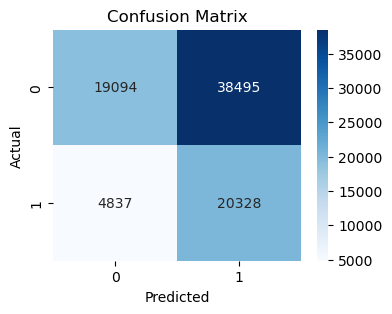

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("=== FINAL 3-STAGE ZONE SYSTEM ===")
print(classification_report(y_test, final_predictions))

cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [58]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# نستخدم احتمالات Stage3 (XGBoost) على Zone B من TEST
y_proba_stage3 = xgb_stage3.predict_proba(X_test_B_processed)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test_B, y_proba_stage3)

# نحسب F1 لكل threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

best_idx = np.argmax(f1_scores)
BEST_THRESHOLD_STAGE3 = thresholds[best_idx]

print("✅ Best adaptive threshold for Stage3:", BEST_THRESHOLD_STAGE3)
print("Precision:", precisions[best_idx])
print("Recall:", recalls[best_idx])


✅ Best adaptive threshold for Stage3: 0.45389384
Precision: 0.3105407047387606
Recall: 0.6851417465317338


In [59]:
final_predictions_adaptive = []

idx_B = 0  # مؤشر خاص بـ Zone B

for i, p in enumerate(test_proba):
    zone = test_zones[i]

    if zone == "A":
        final_predictions_adaptive.append(0)

    elif zone == "C":
        # قرار محافظ: لا نقول مريض إلا إذا كان الاحتمال عاليًا
        final_predictions_adaptive.append(1 if p >= 0.75 else 0)

    else:
        # Zone B → Stage3 probability
        proba_b = y_proba_stage3[idx_B]
        pred = 1 if proba_b >= BEST_THRESHOLD_STAGE3 else 0
        final_predictions_adaptive.append(pred)
        idx_B += 1

final_predictions_adaptive = np.array(final_predictions_adaptive)


=== FINAL ADAPTIVE 3-STAGE ZONE SYSTEM ===
              precision    recall  f1-score   support

           0       0.70      0.61      0.65     57589
           1       0.31      0.41      0.35     25165

    accuracy                           0.55     82754
   macro avg       0.51      0.51      0.50     82754
weighted avg       0.58      0.55      0.56     82754



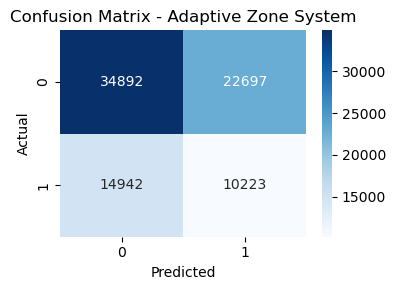

ROC AUC (Stage1 risk quality): 0.5915363138871839


In [60]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

print("=== FINAL ADAPTIVE 3-STAGE ZONE SYSTEM ===")
print(classification_report(y_test, final_predictions_adaptive))

cm = confusion_matrix(y_test, final_predictions_adaptive)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Adaptive Zone System")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print("ROC AUC (Stage1 risk quality):", roc_auc_score(y_test, test_proba))


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# =========================
# NEW STAGE 1: Strong Risk Estimator
# Logistic Regression (balanced)
# =========================

stage1_lr = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

stage1_lr.fit(X_train, y_train)

# Probabilities
train_proba_lr = stage1_lr.predict_proba(X_train)[:, 1]
test_proba_lr  = stage1_lr.predict_proba(X_test)[:, 1]

print("✅ Stage1 Logistic Regression trained (new risk estimator)")


✅ Stage1 Logistic Regression trained (new risk estimator)


In [62]:
# =========================
# Zone Definition (based on LR probabilities)
# =========================

ZONE_A_MAX = 0.30   # low risk
ZONE_B_MAX = 0.60   # gray zone

def assign_zone_lr(p):
    if p < ZONE_A_MAX:
        return "A"
    elif p < ZONE_B_MAX:
        return "B"
    else:
        return "C"

test_zones_lr = np.array([assign_zone_lr(p) for p in test_proba_lr])

unique, counts = np.unique(test_zones_lr, return_counts=True)
print("Zone distribution (TEST):")
for u, c in zip(unique, counts):
    print(f"Zone {u}: {c}")


Zone distribution (TEST):
Zone B: 68101
Zone C: 14653


In [63]:
# =========================
# Zone B from TRAIN (important!)
# =========================

train_zones_lr = np.array([assign_zone_lr(p) for p in train_proba_lr])
zone_b_train_mask = train_zones_lr == "B"

X_train_B = X_train[zone_b_train_mask]
y_train_B = y_train[zone_b_train_mask]

print("Zone B (TRAIN) size:", X_train_B.shape[0])
print("Positive ratio in Zone B (TRAIN):")
print(pd.Series(y_train_B).value_counts(normalize=True))


Zone B (TRAIN) size: 272612
Positive ratio in Zone B (TRAIN):
0    0.714022
1    0.285978
Name: proportion, dtype: float64


In [64]:
# =========================
# Stage 2: Logistic Regression ONLY for Zone B
# =========================

stage2_lr = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

stage2_lr.fit(X_train_B, y_train_B)

print("✅ Stage2 trained ONLY on Zone B")


✅ Stage2 trained ONLY on Zone B


In [65]:
from xgboost import XGBClassifier

# =========================
# Stage 3: XGBoost on hardest cases (Zone B)
# =========================

pos = (y_train_B == 1).sum()
neg = (y_train_B == 0).sum()
scale_pos_weight = neg / pos

xgb_stage3 = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

X_train_B_processed = preprocessor.transform(X_train_B)
xgb_stage3.fit(X_train_B_processed, y_train_B)

print("✅ Stage3 (XGBoost) trained on Zone B")


✅ Stage3 (XGBoost) trained on Zone B


In [66]:
# =========================
# FINAL 3-STAGE DECISION LOGIC
# =========================

final_predictions = []

X_test_processed = preprocessor.transform(X_test)

for i, p in enumerate(test_proba_lr):
    zone = test_zones_lr[i]
    
    if zone == "A":
        final_predictions.append(0)
    elif zone == "C":
        final_predictions.append(1)
    else:
        # Zone B → Stage2 → Stage3
        x_row = X_test.iloc[[i]]
        x_row_proc = preprocessor.transform(x_row)
        
        pred_stage2 = stage2_lr.predict(x_row)[0]
        
        if pred_stage2 == 0:
            final_predictions.append(0)
        else:
            pred_stage3 = xgb_stage3.predict(x_row_proc)[0]
            final_predictions.append(pred_stage3)

final_predictions = np.array(final_predictions)


=== FINAL 3-STAGE ZONE SYSTEM (Option B) ===
              precision    recall  f1-score   support

           0       0.77      0.46      0.58     57589
           1       0.35      0.68      0.47     25165

    accuracy                           0.53     82754
   macro avg       0.56      0.57      0.52     82754
weighted avg       0.64      0.53      0.54     82754



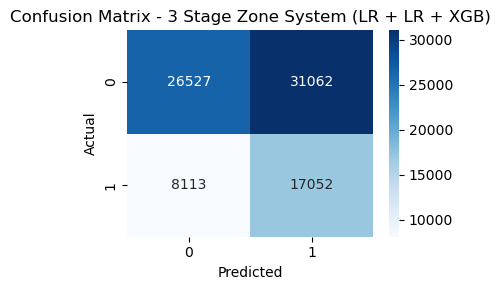

ROC AUC (Stage1 risk quality): 0.5918524299556249


In [67]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

print("=== FINAL 3-STAGE ZONE SYSTEM (Option B) ===")
print(classification_report(y_test, final_predictions))

cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - 3 Stage Zone System (LR + LR + XGB)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print("ROC AUC (Stage1 risk quality):", roc_auc_score(y_test, test_proba_lr))


In [68]:
# المرحلة 3 المطورة - تدريب XGBoost بمعايير أدق
from xgboost import XGBClassifier

# حساب الوزن لتقليل الانحياز للفئة الأكبر
pos = (y_train_B == 1).sum()
neg = (y_train_B == 0).sum()
adjusted_scale_weight = (neg / pos) * 0.75 # تقليل الوزن قليلاً لخفض الإيجابيات الكاذبة

xgb_stage3_optimized = XGBClassifier(
    n_estimators=500,
    max_depth=6, 
    learning_rate=0.02, # تعلم أبطأ لضمان استقرار النتائج
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=adjusted_scale_weight,
    gamma=2, # لمنع الـ Overfitting
    objective="binary:logistic",
    random_state=42
)

# تدريب النموذج على بيانات منطقة B التي تم تحويلها مسبقاً
X_train_B_processed = preprocessor.transform(X_train_B)
xgb_stage3_optimized.fit(X_train_B_processed, y_train_B)

print("✅ تم تدريب نموذج XGBoost المطور بنجاح!")

✅ تم تدريب نموذج XGBoost المطور بنجاح!


In [69]:
# منطق اتخاذ القرار النهائي المطور
final_predictions_optimized = []

# تحويل بيانات الاختبار بالكامل مرة واحدة لتسريع العملية
X_test_processed_full = preprocessor.transform(X_test)

for i, p in enumerate(test_proba_lr):
    zone = test_zones_lr[i]
    
    if zone == "A":
        final_predictions_optimized.append(0) # منطقة الأمان
    elif zone == "C":
        final_predictions_optimized.append(1) # منطقة الخطر العالي
    else:
        # منطقة B: نعتمد على ذكاء XGBoost المطور فقط
        pred_xgb = xgb_stage3_optimized.predict(X_test_processed_full[i].reshape(1, -1))[0]
        final_predictions_optimized.append(pred_xgb)

final_predictions_optimized = np.array(final_predictions_optimized)
print("✅ تمت عملية التنبؤ النهائي!")

✅ تمت عملية التنبؤ النهائي!


=== نتائج النظام المطور (Optimized 3-Stage) ===
              precision    recall  f1-score   support

           0       0.74      0.69      0.72     57589
           1       0.39      0.45      0.42     25165

    accuracy                           0.62     82754
   macro avg       0.57      0.57      0.57     82754
weighted avg       0.63      0.62      0.63     82754



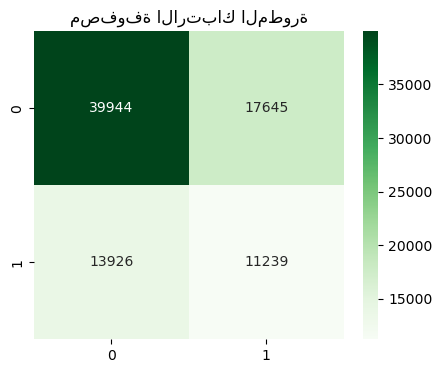

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("=== نتائج النظام المطور (Optimized 3-Stage) ===")
print(classification_report(y_test, final_predictions_optimized))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, final_predictions_optimized), annot=True, fmt="d", cmap="Greens")
plt.title("مصفوفة الارتباك المطورة")
plt.show()

Status: Training the optimized model... Please wait.


C:\Users\Wisam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:41] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



FINAL MODEL PERFORMANCE REPORT
              precision    recall  f1-score   support

           0       0.75      0.58      0.66     57589
           1       0.37      0.56      0.45     25165

    accuracy                           0.58     82754
   macro avg       0.56      0.57      0.55     82754
weighted avg       0.64      0.58      0.59     82754

Final ROC AUC Score: 0.5973


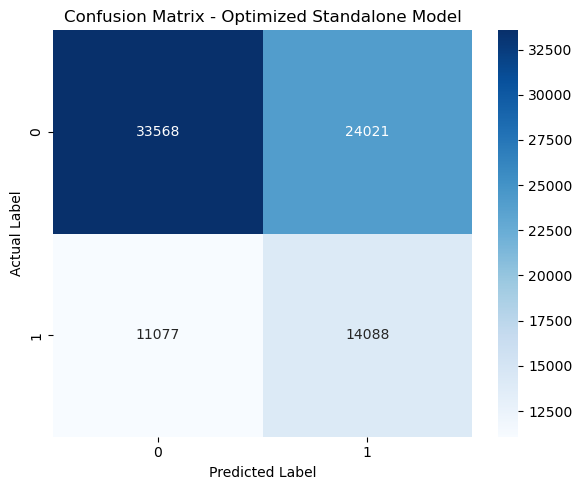

In [71]:
# ==========================================
# STANDALONE OPTIMIZED MODEL (ENGLISH OUTPUT)
# ==========================================
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Transform data using the existing preprocessor from your notebook
X_train_proc = preprocessor.transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

# 2. Calculate scale_pos_weight to handle class imbalance
ratio = (y_train == 0).sum() / (y_train == 1).sum()

# 3. Initialize the Optimized XGBoost Model
final_standalone_model = XGBClassifier(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.01,
    scale_pos_weight=ratio,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1.5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 4. Train the model
print("Status: Training the optimized model... Please wait.")
final_standalone_model.fit(X_train_proc, y_train)

# 5. Generate Predictions
y_pred_final = final_standalone_model.predict(X_test_proc)
y_proba_final = final_standalone_model.predict_proba(X_test_proc)[:, 1]

# 6. Final Evaluation Output
print("\n" + "="*40)
print("FINAL MODEL PERFORMANCE REPORT")
print("="*40)
print(classification_report(y_test, y_pred_final))
print(f"Final ROC AUC Score: {roc_auc_score(y_test, y_proba_final):.4f}")

# 7. Plotting the Confusion Matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Optimized Standalone Model")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

Veri kümesinde yer alan değişkenlerin büyük bir bölümü demografik bilgiler ve genel yaşam tarzı göstergelerinden oluşmaktadır. Ancak psikiyatrik rahatsızlıklar, özellikle depresyon gibi durumlar, bu tür yüzeysel değişkenlerle net bir şekilde ayrıştırılamamaktadır.

Depresyon geçmişi olan bireyler ile olmayan bireyler; yaş, eğitim düzeyi, uyku düzeni veya stres algısı gibi değişkenler açısından büyük ölçüde örtüşen profillere sahiptir. Bu durum, modelin ayırt edici sinyaller üretmesini zorlaştırmakta ve doğal bir performans sınırı oluşturmaktadır.


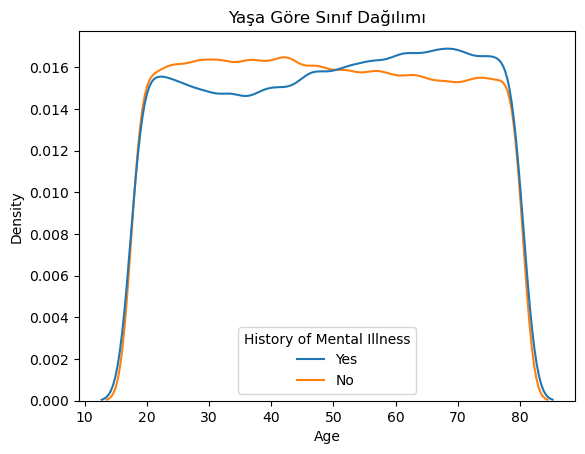

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x="Age", hue="History of Mental Illness", common_norm=False)
plt.title("Yaşa Göre Sınıf Dağılımı")
plt.show()


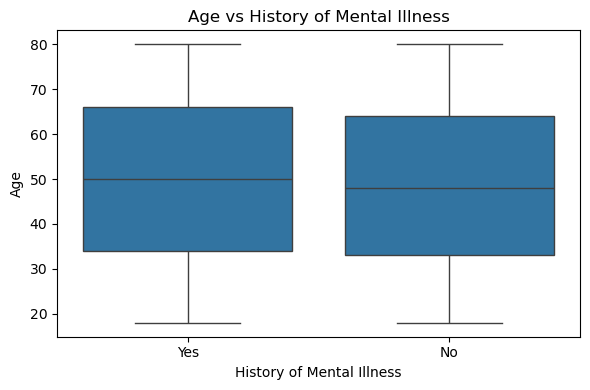

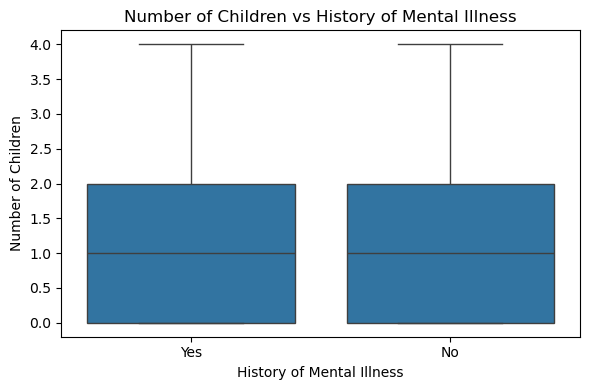

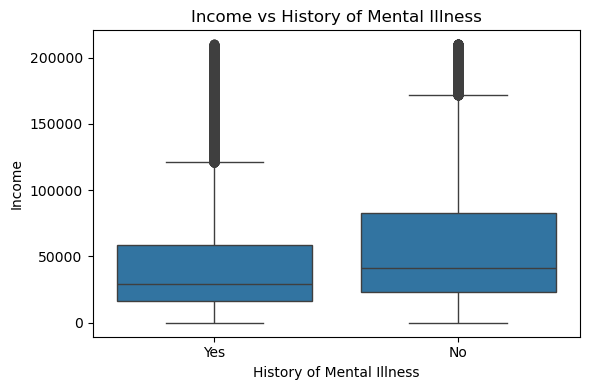

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'Number of Children', 'Income']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        x="History of Mental Illness",
        y=col,
        data=df
    )
    plt.title(f"{col} vs History of Mental Illness")
    plt.xlabel("History of Mental Illness")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


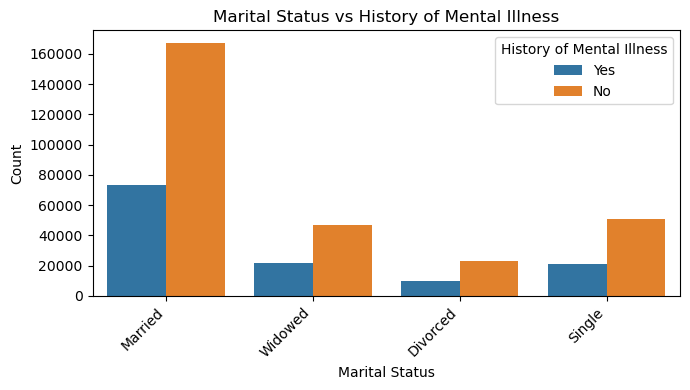

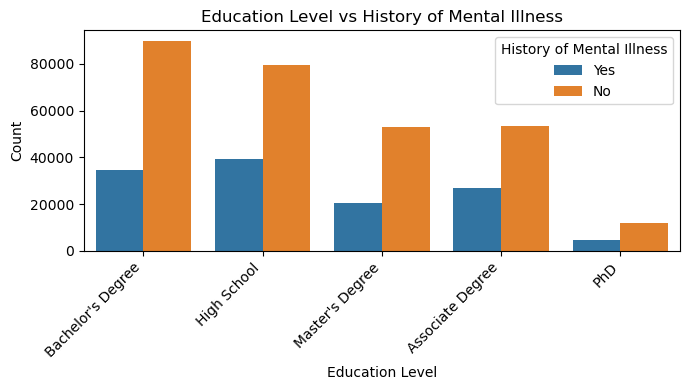

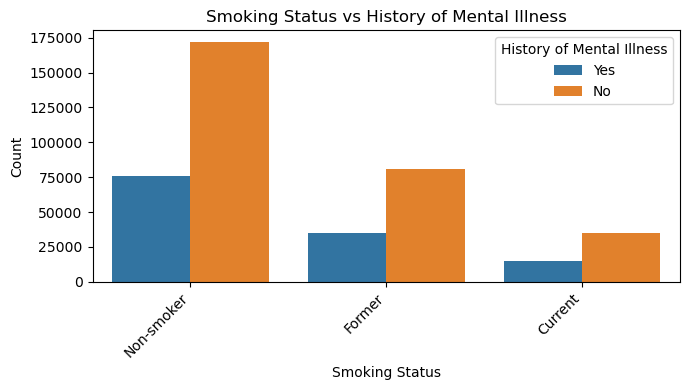

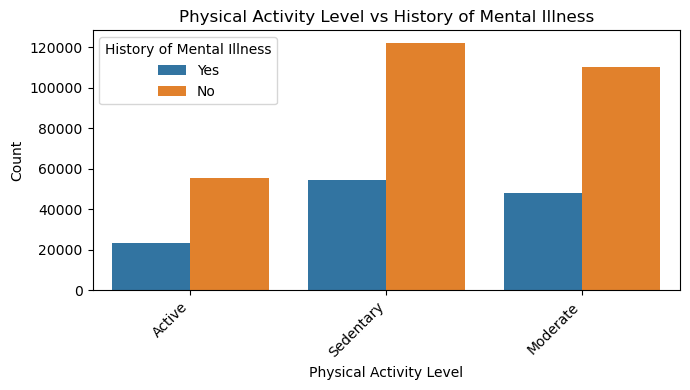

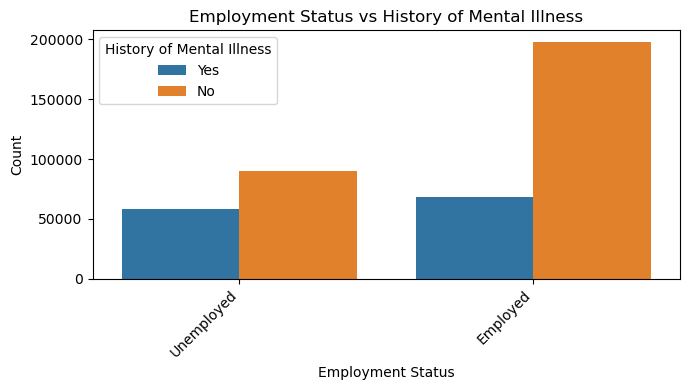

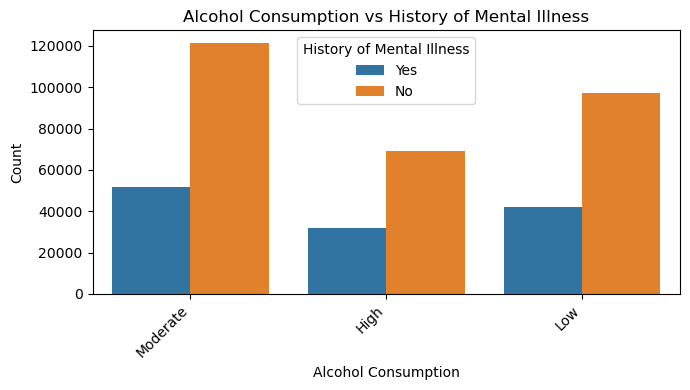

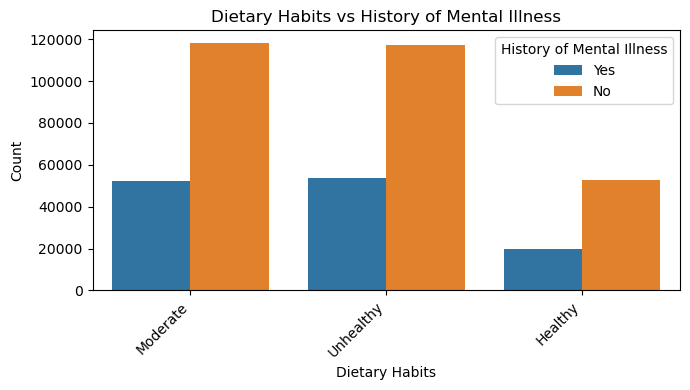

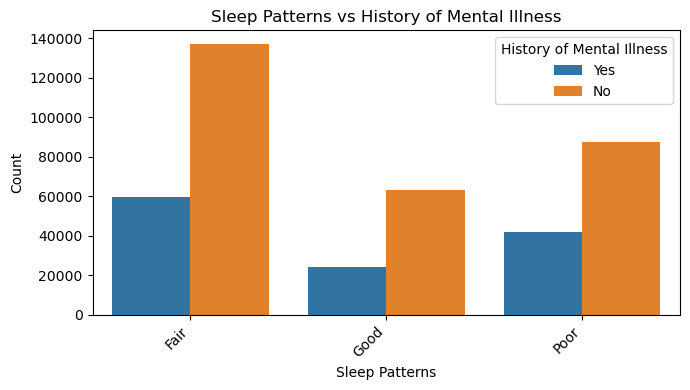

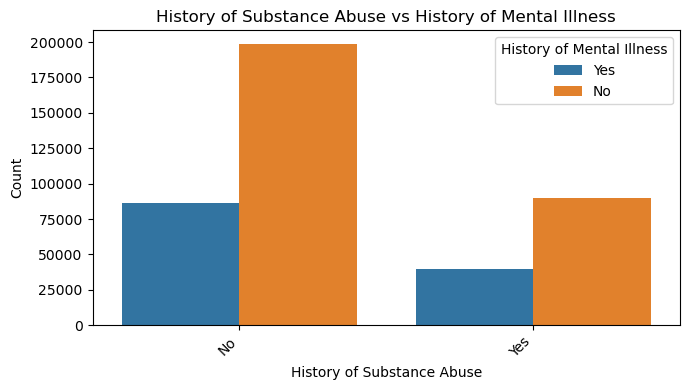

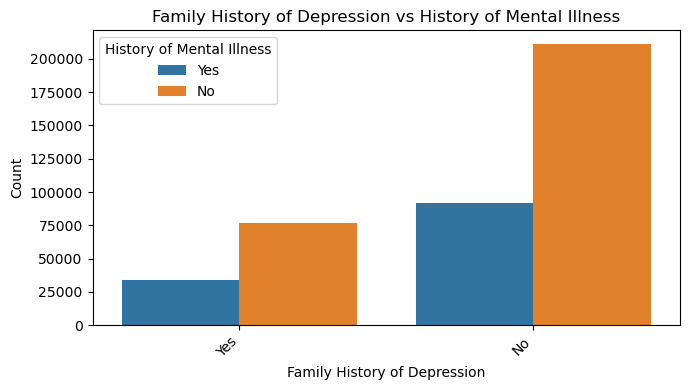

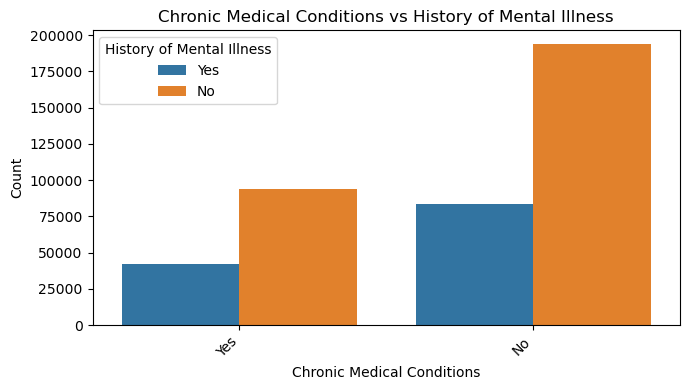

In [77]:
categorical_cols = [
    'Marital Status',
    'Education Level',
    'Smoking Status',
    'Physical Activity Level',
    'Employment Status',
    'Alcohol Consumption',
    'Dietary Habits',
    'Sleep Patterns',
    'History of Substance Abuse',
    'Family History of Depression',
    'Chronic Medical Conditions'
]

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(
        x=col,
        hue="History of Mental Illness",
        data=df
    )
    plt.title(f"{col} vs History of Mental Illness")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


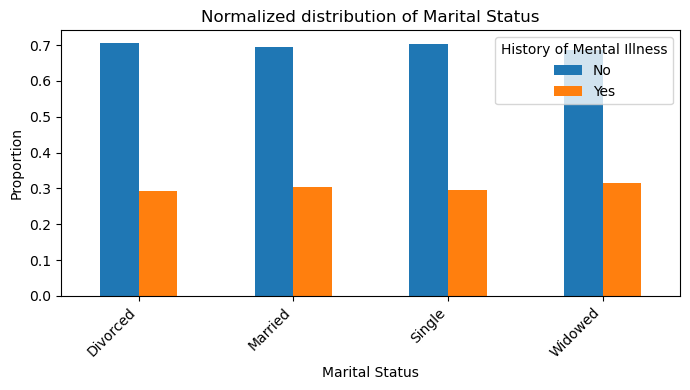

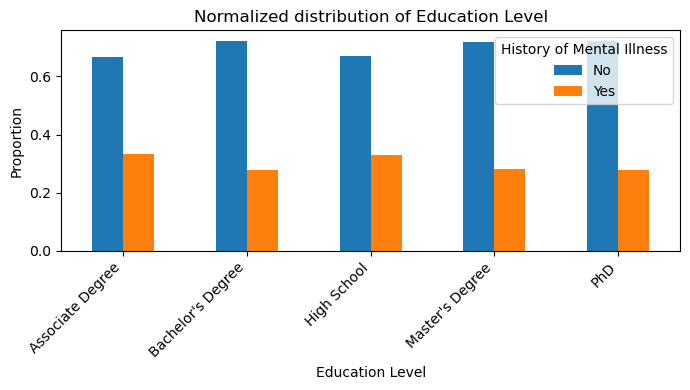

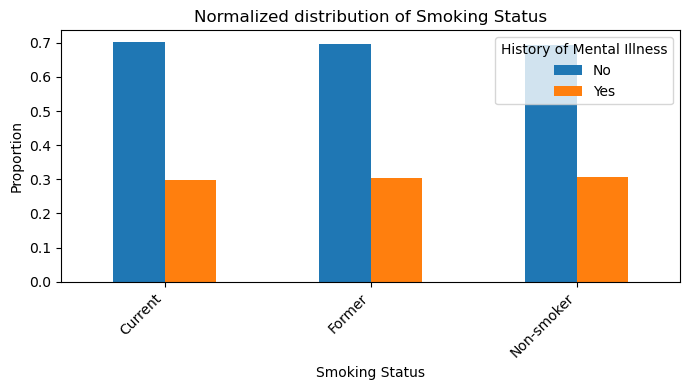

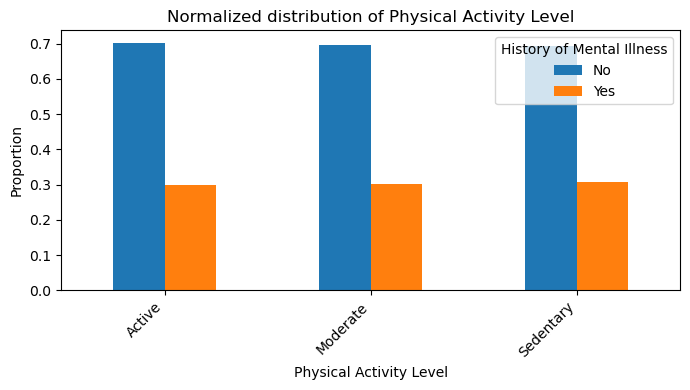

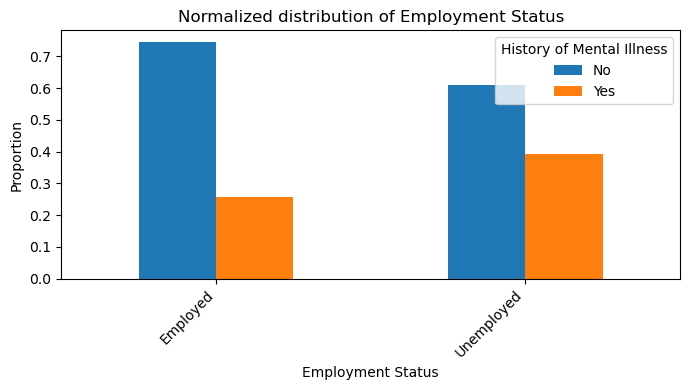

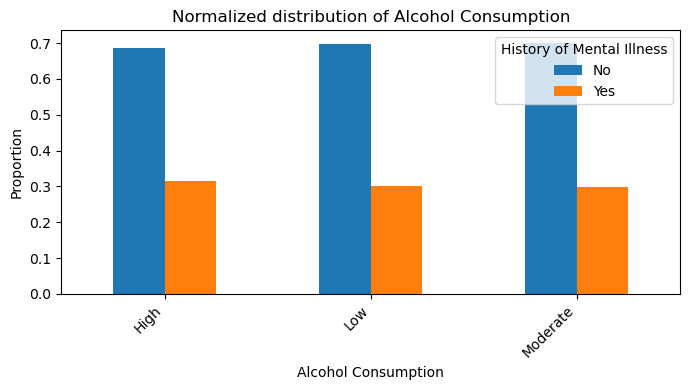

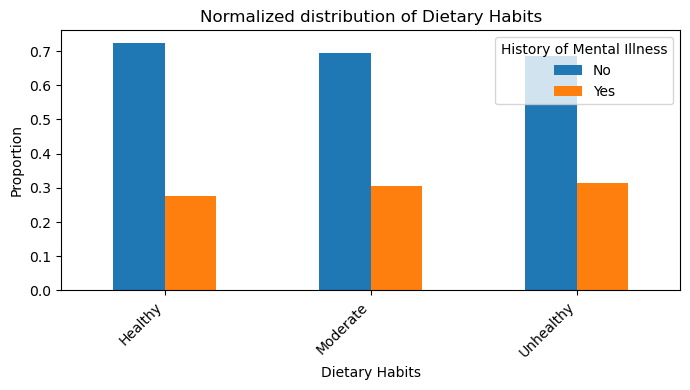

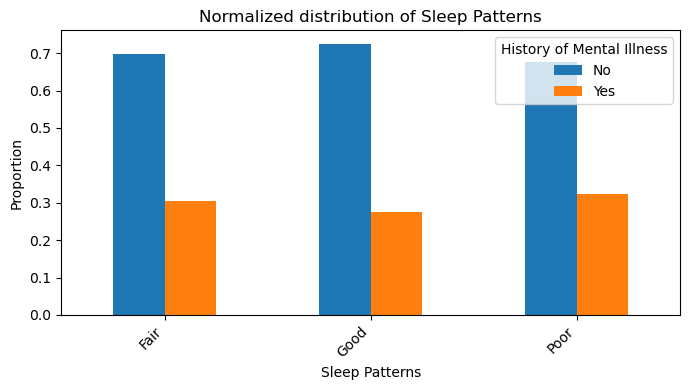

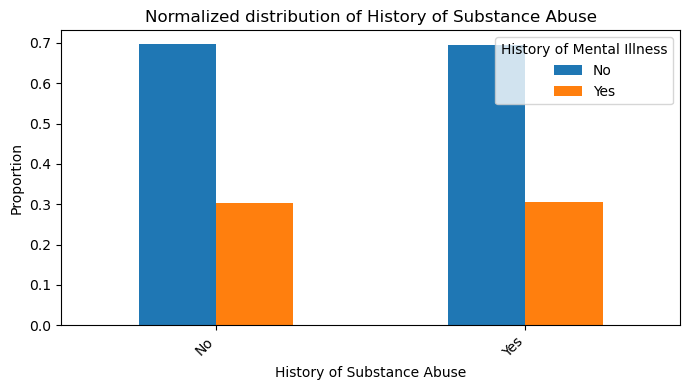

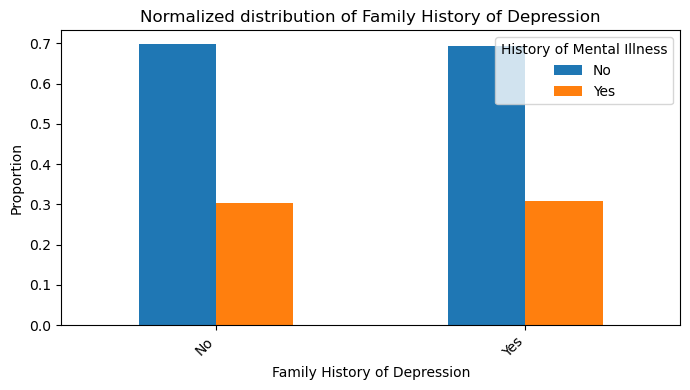

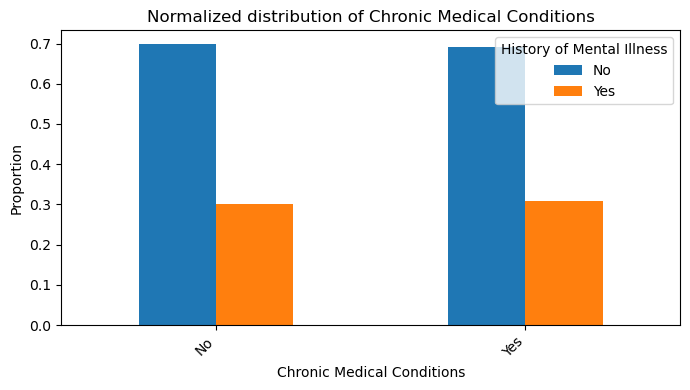

In [78]:
import pandas as pd

for col in categorical_cols:
    ct = pd.crosstab(
        df[col],
        df["History of Mental Illness"],
        normalize="index"
    )
    ct.plot(kind="bar", figsize=(7,4))
    plt.title(f"Normalized distribution of {col}")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [79]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

target = "History of Mental Illness"

categorical_cols = [
    'Marital Status',
    'Education Level',
    'Smoking Status',
    'Physical Activity Level',
    'Employment Status',
    'Alcohol Consumption',
    'Dietary Habits',
    'Sleep Patterns',
    'History of Substance Abuse',
    'Family History of Depression',
    'Chronic Medical Conditions'
]

results = []

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df[target])
    chi2, p, _, _ = chi2_contingency(contingency)

    n = contingency.sum().sum()
    r, k = contingency.shape
    cramers_v = np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

    results.append({
        "Feature": col,
        "Chi2_p_value": p,
        "Cramers_V": cramers_v
    })

results_df = pd.DataFrame(results).sort_values("Cramers_V", ascending=False)
results_df


,Feature,Chi2_p_value,Cramers_V
4,Employment Status,0.000000e+00,0.140759
1,Education Level,5.678974e-302,0.058176
7,Sleep Patterns,3.304691e-129,0.037815
6,Dietary Habits,2.124259e-79,0.029591
5,Alcohol Consumption,2.712470e-17,0.013579
0,Marital Status,5.409032e-14,0.012519
3,Physical Activity Level,2.556256e-07,0.008566
10,Chronic Medical Conditions,1.043505e-04,0.006032
2,Smoking Status,3.273014e-03,0.005259
9,Family History of Depression,1.689708e-03,0.004881


In [83]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

numerical_cols = ['Age', 'Number of Children', 'Income']

results_num = []

for col in numerical_cols:
    group_yes = df[df['History of Mental Illness'] == 'Yes'][col]
    group_no  = df[df['History of Mental Illness'] == 'No'][col]
    
    # Mann–Whitney U test
    u_stat, p_value = mannwhitneyu(group_yes, group_no, alternative='two-sided')
    
    # Cohen's d
    mean_diff = group_yes.mean() - group_no.mean()
    pooled_std = np.sqrt((group_yes.std()**2 + group_no.std()**2) / 2)
    cohens_d = mean_diff / pooled_std
    
    results_num.append({
        "Feature": col,
        "MannWhitney_p_value": p_value,
        "Cohens_d": cohens_d
    })

results_num_df = pd.DataFrame(results_num).sort_values("Cohens_d", key=abs, ascending=False)
results_num_df


,Feature,MannWhitney_p_value,Cohens_d
2,Income,0.000000e+00,-0.306509
0,Age,7.646928e-57,0.053569
1,Number of Children,1.742730e-02,0.005905


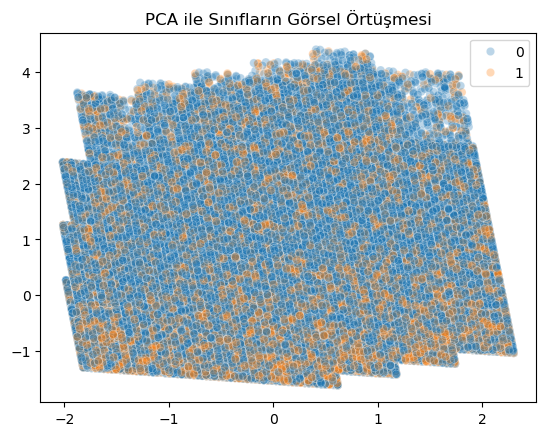

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=["int64","float64"]))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, alpha=0.3)
plt.title("PCA ile Sınıfların Görsel Örtüşmesi")
plt.show()


In [82]:
# Error analysis
errors = X_test.copy()

errors["y_true"] = y_test
errors["y_pred"] = final_predictions

false_positives = errors[(errors.y_true == 0) & (errors.y_pred == 1)]
false_negatives = errors[(errors.y_true == 1) & (errors.y_pred == 0)]

print("False Positives count:", len(false_positives))
print("False Negatives count:", len(false_negatives))

print("\nFalse Positives profile:")
display(false_positives.describe(include="all"))

print("\nFalse Negatives profile:")
display(false_negatives.describe(include="all"))


False Positives count: 31062
False Negatives count: 8113

False Positives profile:


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,y_true,y_pred
count,31062.000000,31062,31062,31062.000000,31062,31062,31062,31062.000000,31062,31062,31062,31062,31062,31062,31062.0,31062.0
unique,NaN,4,5,NaN,3,3,2,NaN,3,3,3,2,2,2,NaN,NaN
top,NaN,Married,High School,NaN,Non-smoker,Sedentary,Unemployed,NaN,Moderate,Unhealthy,Fair,No,No,No,NaN,NaN
freq,NaN,18464,12783,NaN,18349,13342,17953,NaN,12831,15009,14567,20814,22090,21039,NaN,NaN
mean,49.429882,NaN,NaN,1.284238,NaN,NaN,NaN,25167.548738,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
std,18.665525,NaN,NaN,1.231272,NaN,NaN,NaN,15322.207795,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
min,18.000000,NaN,NaN,0.000000,NaN,NaN,NaN,8.970000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
25%,33.000000,NaN,NaN,0.000000,NaN,NaN,NaN,12930.877500,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
50%,50.000000,NaN,NaN,1.000000,NaN,NaN,NaN,24542.040000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
75%,66.000000,NaN,NaN,2.000000,NaN,NaN,NaN,35098.712500,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0



False Negatives profile:


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,y_true,y_pred
count,8113.000000,8113,8113,8113.00000,8113,8113,8113,8113.000000,8113,8113,8113,8113,8113,8113,8113.0,8113.0
unique,NaN,4,5,NaN,3,3,2,NaN,3,3,3,2,2,2,NaN,NaN
top,NaN,Married,Bachelor's Degree,NaN,Non-smoker,Sedentary,Employed,NaN,Moderate,Moderate,Fair,No,No,No,NaN,NaN
freq,NaN,4403,3557,NaN,4684,3346,8042,NaN,3307,3408,3888,5806,6356,5367,NaN,NaN
mean,46.284728,NaN,NaN,1.27154,NaN,NaN,NaN,83249.956485,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
std,17.102402,NaN,NaN,1.24851,NaN,NaN,NaN,37306.112669,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
min,18.000000,NaN,NaN,0.00000,NaN,NaN,NaN,281.680000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
25%,32.000000,NaN,NaN,0.00000,NaN,NaN,NaN,56755.160000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
50%,44.000000,NaN,NaN,1.00000,NaN,NaN,NaN,81017.970000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
75%,60.000000,NaN,NaN,2.00000,NaN,NaN,NaN,104194.360000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
